# AP156 Week 3 (22 Aug 18)

Domingo, Kenneth V.<br />
2015-03116

Primary references:
1. Kinzel, W., and G. Reents (1998). Electrical circuits. In M. Clajus, and B. Freeland-Clajus (Trans.), <i>Physics by computer: Programming physical problems using Mathematica and C</i> (pp. 52-59). New York: Springer (Original work published 1996).

In [1]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.signal as sig
import numpy.fft as fft
%matplotlib inline
mp.rc("text", usetex=True)

## 2.2 Electrical circuits


We consider an alternating voltage $V(t)$ and the corresponding alternating current $I(t)$ and express both as complex-valued functions:

\begin{equation}\label{eq:altvolt}\tag{2.9.1}
    V(t) = V_0 e^{i\omega t}
\end{equation}

\begin{equation}\label{eq:altcurr}\tag{2.9.2}
    I(t) = I_0 e^{i\omega t}
\end{equation}

where $V_0$ and $I_0$ are complex quantities whose phase difference indicates how much the current oscillation precedes or lags behind the voltage oscillation. With Ohm's law:

\begin{equation}\tag{2.10}
    V_0 = ZI_0
\end{equation}

with complex impedance $Z$. For an ohmic resistance $R$, capacitance $C$, and inductance $L$, $Z$ is given by:

\begin{equation}\tag{2.11}
    Z = R = \frac{1}{i\omega C} = i\omega L
\end{equation}

For an $L$-$C$ oscillatory circuit connected in series with a resistance $R$, let $V_i$ and $V_o$ be complex amplitudes of the input & output voltages with angular frequency $\omega$, and let $I_R$, $I_C$, and $I_L$ be the amplitudes of the currents, which, after the transient, have the same frequency as the input voltage. The following equations hold:

\begin{equation}\tag{2.12.1}
    V_R + V_o = V_i
\end{equation}
\begin{equation}\tag{2.12.2}
    I_R = I_C + I_L
\end{equation}
\begin{equation}\tag{2.12.3}
    V_R = RI_R
\end{equation}
\begin{equation}\tag{2.12.4}
    V_o = \frac{1}{i\omega C}I_C
\end{equation}
\begin{equation}\tag{2.12.5}
    V_o = i\omega L I_L
\end{equation}

Independently of $R$, the magnitude of the output voltage $V_o$ always reaches a maximum at $\omega = \frac{1}{LC}$; at this frequency, the impedance of the circuit is infinite.


In [33]:
def Vo(w,R,C,L):
    num = -1j*w*L
    den = -1j*w*L - R + R*C*L*w**2
    func = num/den
    return func,num,den

def phi(func,w,R,C,L):
    return np.arctan(func.imag/func.real)

In [12]:
def polarticks_2(value,tick_number):
    N = int(np.round(2*value/np.pi))
    if N == 0:
        return r"$0$"
    elif N == -1:
        return r"$-\pi/2$"
    elif N == 1:
        return r"$\pi/2$"
    elif N == -2:
        return r"$-\pi$"
    elif N == 2:
        return r"$\pi$"
    elif N%2 < 0:
        return r"$-{0}\frac{\pi}{2}$".format(N)
    elif N%2 > 0 or N%2 < 0:
        return r"${0}\frac{\pi}{2}$".format(N)
    else:
        return r"${0}\pi$".format(N//2)

In [34]:
L = 1e-3 # henries
C = 1e-6 # farads
w = np.linspace(20000,45000,500)
R = np.array([ 100, 300, 900, 2700 ], int)
w_r = 1/np.sqrt(L*C)
w_f = np.linspace(-np.pi/2,np.pi/2,500)

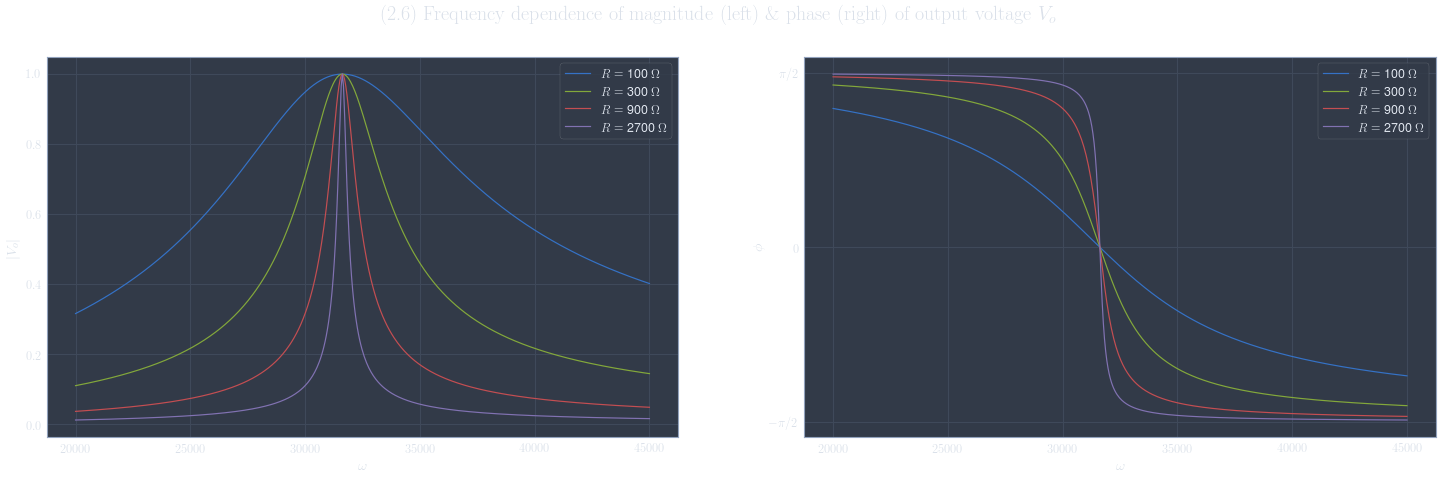

In [14]:
fig,(ax1,ax2) = mp.subplots(nrows=1,ncols=2,figsize=(7*16/9*2,7))
mp.suptitle(r"\textrm{(2.6) Frequency dependence of magnitude (left) \& phase (right) of output voltage $V_o$}", fontsize=20)

#ax1.set_title(r"\textrm{Frequency dependence of magnitude}")
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"$|V_o|$")
for r in R:
    ax1.plot(w, abs(Vo(w,r,C,L)[0]), label=r"$R=$ %i $ \Omega$"%r)
ax1.legend()

#ax2.set_title(r"\textrm{Frequency dependence of phase}")
ax2.set_xlabel(r"$\omega$")
ax2.set_ylabel(r"$\phi$")
ax2.yaxis.set_major_locator(mp.MultipleLocator(np.pi/2))
ax2.yaxis.set_major_formatter(mp.FuncFormatter(polarticks_2))

for r in R:
    func,num,den = Vo(w,r,C,L)
    ax2.plot(w,phi(func,w_f,r,C,L), label=r"$R=$ %i $ \Omega$"%r)
ax2.legend()
    
mp.show()

In [35]:
dt = 3/1000
t = np.arange(256)/256
f = 1 # Hz
#T = 2*np.pi/f/w_r
#w = 2*np.pi*f*t
def Vin(f,t):
    return sig.sawtooth(2*np.pi*f*t, width=1)
Vi = Vin(1,t)

In [17]:
def Vout(Vin,R,f):
    T = 2*np.pi/f/w_r
    b,w_s = dft(Vin(f,t),T)
    N = len(b)
    b_t = np.zeros(N)
    #for s in range(N//2,N):
    #    w_s[s] = w_s[s-N]
    b_t = b*Vo(w_s,R,C,L)[0]
    Vout = idft(b_t,T)
    return Vout

V_o1 = Vout(Vin,2700,1)

In [43]:
alist = (1/np.sqrt(256)) * Vi
blist = np.sqrt(256) * fft.fft(alist)

def Vout(f,r):
    w_i = f*w_r
    volist = np.concatenate(([Vo(w_i*s,r,C,L)[0] for s in np.arange(1, 129)],[0.0],[Vo(w_i*s,r,C,L)[0] for s in np.arange(-127, 0)]))
    vtrans = fft.ifft(blist * volist)
    plotlist = np.array([[(k+1)/256., vtrans[k%256]] for k in range(768)])
    #mp.plot(plotlist[:,0], plotlist[:,1])
    # what does the following line do?
    #mp.axhline(0)
    # add labels
    #mp.show()
    return plotlist

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


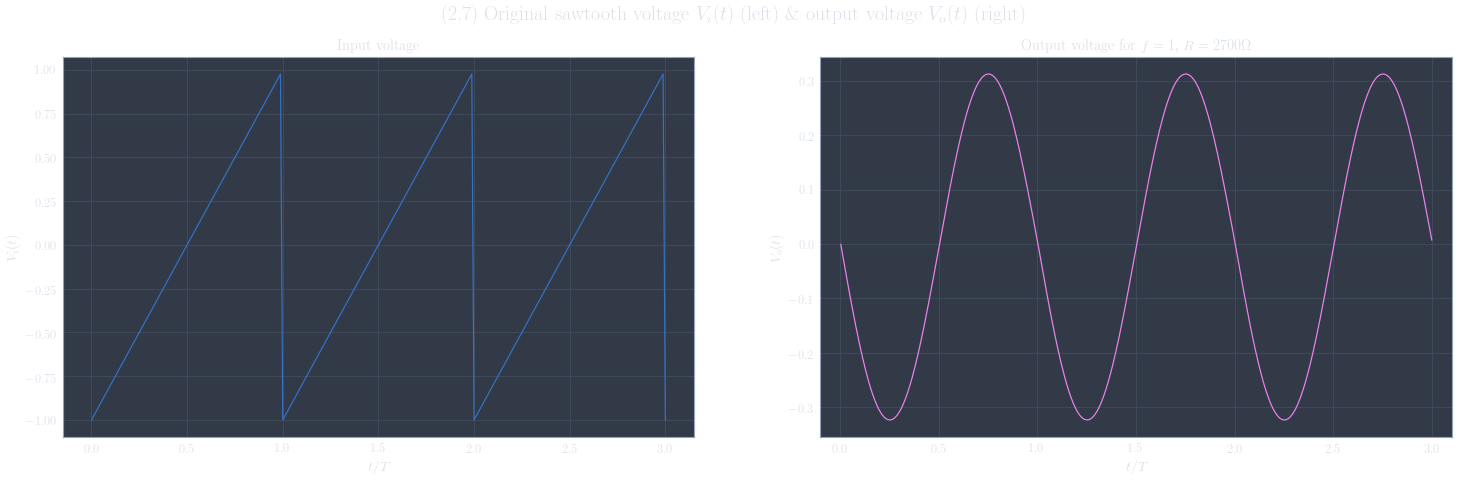

In [40]:
fig,(ax1,ax2) = mp.subplots(nrows=1,ncols=2,figsize=(7*16/9*2,7))
mp.suptitle(r"\textrm{(2.7) Original sawtooth voltage $V_i(t)$ (left) \& output voltage $V_o(t)$ (right)}",fontsize=20)

t = np.linspace(0,3,256)
ax1.plot(t,Vin(1,t))
ax1.set_xlabel(r"$t/T$")
ax1.set_ylabel(r"$V_i(t)$")
ax1.set_title(r"\textrm{Input voltage}")

ax2.plot(Vout(1.,2700)[:,0],Vout(1.,2700)[:,1], color="violet")
ax2.set_xlabel(r"$t/T$")
ax2.set_ylabel(r"$V_o(t)$")
ax2.set_xlim(-0.1,3.1)
ax2.set_title(r"\textrm{Output voltage for }$f=1$, $R=2700\Omega$")

mp.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


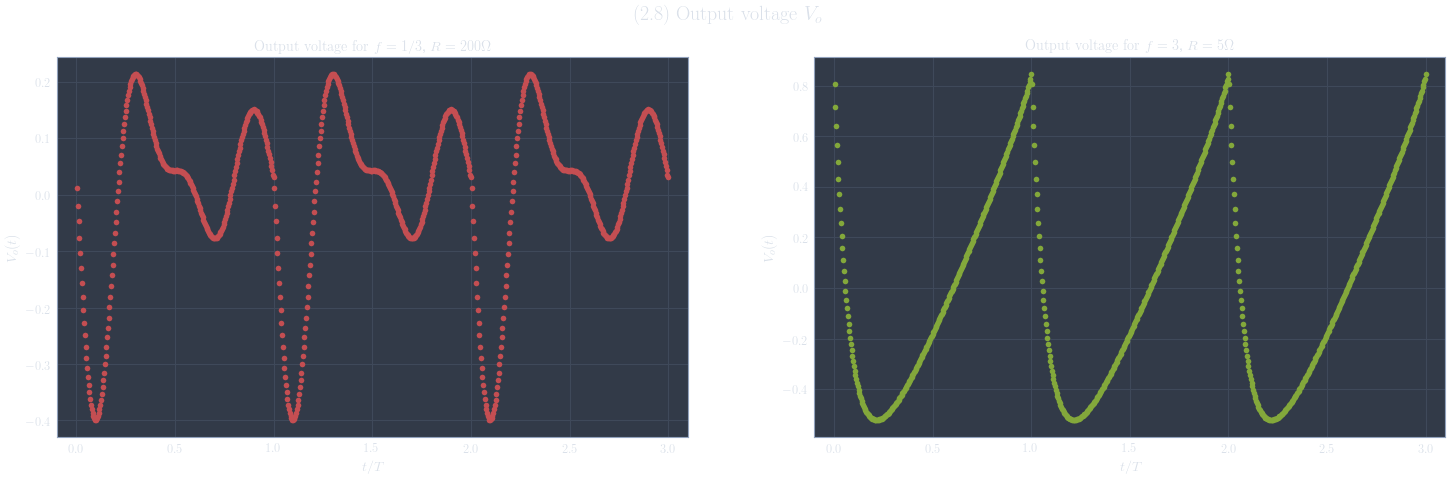

In [42]:
fig,(ax1,ax2) = mp.subplots(nrows=1,ncols=2,figsize=(7*16/9*2,7))
mp.suptitle(r"\textrm{(2.8) Output voltage $V_o$}",fontsize=20)

f,r = 1/3,200
ax1.plot(Vout(f,r)[:,0],Vout(f,r)[:,1], "ro")
ax1.set_xlabel(r"$t/T$")
ax1.set_ylabel(r"$V_o(t)$")
ax1.set_xlim(-0.1,3.1)
ax1.set_title(r"\textrm{Output voltage for }$f=1/3$, $R=200\Omega$")

f,r = 3,5
ax2.plot(Vout(f,r)[:,0],Vout(f,r)[:,1], "go")
ax2.set_xlabel(r"$t/T$")
ax2.set_ylabel(r"$V_o(t)$")
ax2.set_xlim(-0.1,3.1)
ax2.set_title(r"\textrm{Output voltage for }$f=3$, $R=5\Omega$")

mp.show()

In [19]:
def Vo(w,R,C,L):
    num = C*L*w**2
    den = C*L*w**2 + (C*L*w**2 - 1)*(1 - C*L*w**2 + 1j*C*R*w)
    func = num/den
    return func,num,den

In [20]:
L = 1e-3 # henries
C = 1e-6 # farads
w = np.linspace(10000,70000,500)
R = np.array([ 10, 30, 90 ], int)
w_1 = np.sqrt(1/2/L/C)
w_2 = np.sqrt(2/L/C)
w_f = np.linspace(-np.pi/2,np.pi/2,500)

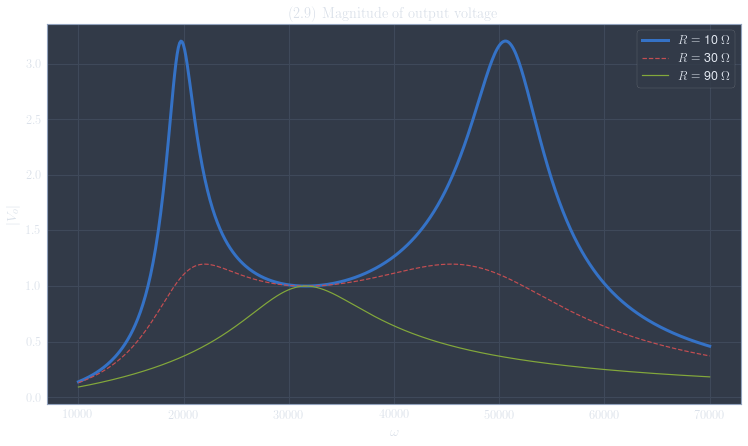

In [21]:
mp.figure(figsize=(7*16/9,7))
mp.title(r"\textrm{(2.9) Magnitude of output voltage}")

mp.xlabel(r"$\omega$")
mp.ylabel(r"$|V_o|$")

mp.plot(w, abs(Vo(w,R[0],C,L)[0]), "b-", linewidth=3, label=r"$R=$ %i $ \Omega$"%R[0])
mp.plot(w, abs(Vo(w,R[1],C,L)[0]), "r--", label=r"$R=$ %i $ \Omega$"%R[1])
mp.plot(w, abs(Vo(w,R[2],C,L)[0]), "g-", label=r"$R=$ %i $ \Omega$"%R[2])

mp.legend()    
mp.show()

In [22]:
def Ir(w,R,C,L):
    return (1j*w*C + 1/(1j*w*L))*func

def P0(Vi,R):
    return abs(Vi)**2/2/R

def P(w,R,C,L):
    return abs(Ir(w,R,C,L))**2*R/2

R = 10
Vi = 1
func = Vo(w,R,C,L)[0]

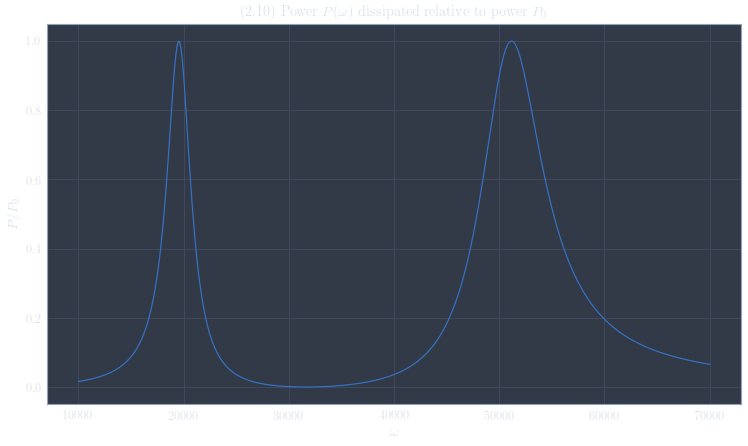

In [23]:
mp.figure(figsize=(7*16/9,7))
mp.title(r"\textrm{(2.10) Power $P(\omega)$ dissipated relative to power $P_0$}")

mp.xlabel(r"$\omega$")
mp.ylabel(r"$P/P_0$")
mp.plot(w, P(w,R,C,L)/P0(Vi,R))

mp.show()